# import library

# Import Libraries

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset , random_split ,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim

In [2]:
train_dataset = datasets.SVHN(root='/root', split = 'train', transform= ToTensor(), target_transform = None, download = True)
test_dataset = datasets.SVHN(root='/root', split = 'test', transform= ToTensor(), target_transform = None, download = True)

100%|██████████| 182040794/182040794 [00:06<00:00, 27380263.38it/s]


100%|██████████| 64275384/64275384 [00:03<00:00, 19378590.95it/s]


In [3]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split train_dataset into train and validation datasets
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [4]:
# Define batch sizes
batch_size = 64

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [5]:
torch.manual_seed(42)

random_noise = torch.randn(1,168)
random_noise

tensor([[ 1.9269e+00,  1.4873e+00,  9.0072e-01, -2.1055e+00,  6.7842e-01,
         -1.2345e+00, -4.3067e-02, -1.6047e+00, -7.5214e-01,  1.6487e+00,
         -3.9248e-01, -1.4036e+00, -7.2788e-01, -5.5943e-01, -7.6884e-01,
          7.6245e-01,  1.6423e+00, -1.5960e-01, -4.9740e-01,  4.3959e-01,
         -7.5813e-01,  1.0783e+00,  8.0080e-01,  1.6806e+00,  1.2791e+00,
          1.2964e+00,  6.1047e-01,  1.3347e+00, -2.3162e-01,  4.1759e-02,
         -2.5158e-01,  8.5986e-01, -1.3847e+00, -8.7124e-01, -2.2337e-01,
          1.7174e+00,  3.1888e-01, -4.2452e-01,  3.0572e-01, -7.7459e-01,
         -1.5576e+00,  9.9564e-01, -8.7979e-01, -6.0114e-01, -1.2742e+00,
          2.1228e+00, -1.2347e+00, -4.8791e-01, -9.1382e-01, -6.5814e-01,
          7.8024e-02,  5.2581e-01, -4.8799e-01,  1.1914e+00, -8.1401e-01,
         -7.3599e-01, -1.4032e+00,  3.6004e-02, -6.3477e-02,  6.7561e-01,
         -9.7807e-02,  1.8446e+00, -1.1845e+00,  1.3835e+00,  1.4451e+00,
          8.5641e-01,  2.2181e+00,  5.

# Generator code and its basic testins a input tensor

In [6]:
class Generator(nn.Module):
  def __init__(self):

    super(Generator,self).__init__()
    self.fc=nn.Linear(168,2*2*448)
    self.batch_norm=nn.BatchNorm2d(448 )
    self.conv_layer=nn.ConvTranspose2d( in_channels=448, out_channels =256 , kernel_size = 4, stride = 2 ,padding=1 )
    self.batch_norm2=nn.BatchNorm2d(256 )
    self.conv_layer2=nn.ConvTranspose2d( in_channels= 256, out_channels = 128 , kernel_size = 4, stride = 2 ,padding=1  )
    self.batch_norm3=nn.BatchNorm2d(128 )
    self.conv_layer3=nn.ConvTranspose2d( in_channels=  128,out_channels = 64 , kernel_size = 4, stride = 2 ,padding=1 )
    self.conv_layer4=nn.ConvTranspose2d( in_channels=  64, out_channels = 3, kernel_size = 4, stride = 2 ,padding=1 )
    self.tan=nn.Tanh()
    self.relu=torch.nn.ReLU()

  def forward(self,x):
    x=self.fc(x)
    x = x.view(-1, 448, 2, 2)
    x=self.relu(x)
    x=self.batch_norm(x)

    x=self.conv_layer(x)
    x=self.relu(x)
    x=self.batch_norm2(x)

    x=self.conv_layer2(x)
    x=self.relu(x)
    x=self.batch_norm3(x)

    x=self.conv_layer3(x)
    x=self.relu(x)
    x=self.conv_layer4(x)
    x=self.tan(x)

    return x





In [7]:
model=Generator()
fake=model(random_noise)
fake.shape


torch.Size([1, 3, 32, 32])

# Descriminator and its testing with the output the generator

In [8]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.conv1=nn.Conv2d(3,64,4,stride=2)
    self.leakyrelu=nn.LeakyReLU(0.1)
    self.conv2=nn.Conv2d(64,128,4,stride=2)
    self.batch_norm=nn.BatchNorm2d(128 )
    self.conv3=nn.Conv2d(128,256,4,stride=2)
    self.batch_norm2=nn.BatchNorm2d(256 )
    self.fc=nn.Linear(1024,1)

  def forward(self,x):
    x=self.conv1(x)
    x=self.leakyrelu(x)
    x=self.conv2(x)
    x=self.leakyrelu(x)
    x=self.batch_norm(x)
    x=self.conv3(x)
    x=self.leakyrelu(x)
    x=self.batch_norm2(x)
    x=x.view(x.size(0), -1)
    x=self.fc(x)
    return x


In [9]:
model2=Discriminator()

In [10]:
random_noise2 = torch.randn(1,3,32,32)

In [11]:
model2(fake)

tensor([[-0.4971]], grad_fn=<AddmmBackward0>)

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Instantiate the generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function (binary cross-entropy loss)
criterion = nn.BCEWithLogitsLoss()

# Define optimizers for the generator and discriminator
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 10
batch_size = 64


# min max loss training

In [15]:
gen_losses = []
disc_losses = []
val_losses = []

for epoch in range(num_epochs):
    epoch_gen_loss = 0.0
    epoch_disc_loss = 0.0
    epoch_val_loss = 0.0

    # Training phase
    for batch_idx, (real_images, _) in enumerate(train_loader):
        # Train discriminator: maximize log(D(x)) + log(1 - D(G(z)))
        discriminator.zero_grad()

        # Train with real images
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_targets = torch.ones(real_images.size(0), 1).to(device)  # Real labels

        loss_real = criterion(real_outputs, real_targets)
        loss_real.backward()

        # Train with fake images
        noise = torch.randn(batch_size, 168).to(device)  #  168 is the input size
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())  # Detach to avoid generator gradients
        fake_targets = torch.zeros(fake_images.size(0), 1).to(device)  # Fake labels

        loss_fake = criterion(fake_outputs, fake_targets)
        loss_fake.backward()

        optimizer_D.step()

        # Train generator: maximize log(D(G(z)))
        generator.zero_grad()

        fake_outputs = discriminator(fake_images)
        real_targets = torch.ones(fake_images.size(0), 1).to(device)  # Fooling the discriminator

        loss_G = criterion(fake_outputs, real_targets)
        loss_G.backward()

        optimizer_G.step()

        epoch_gen_loss += loss_G.item()
        epoch_disc_loss += loss_real.item() + loss_fake.item()

        if batch_idx % 100 == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(train_loader)} "
                f"Loss D: {loss_real.item() + loss_fake.item()}, Loss G: {loss_G.item()}"
            )

    # Store training losses
    gen_losses.append(epoch_gen_loss / len(train_loader))
    disc_losses.append(epoch_disc_loss / len(train_loader))

    # Validation phase
    with torch.no_grad():
        epoch_val_loss = 0.0
        for val_batch_idx, (val_images, _) in enumerate(val_loader):
            val_images = val_images.to(device)
            val_outputs = discriminator(val_images)
            val_targets = torch.ones(val_images.size(0), 1).to(device)
            val_loss = criterion(val_outputs, val_targets)
            epoch_val_loss += val_loss.item()
        val_losses.append(epoch_val_loss / len(val_loader))




Epoch [0/10] Batch 0/916 Loss D: 1.428800106048584, Loss G: 0.5234899520874023
Epoch [0/10] Batch 100/916 Loss D: 1.3604283332824707, Loss G: 0.797429084777832
Epoch [0/10] Batch 200/916 Loss D: 1.3107349872589111, Loss G: 0.7694038152694702
Epoch [0/10] Batch 300/916 Loss D: 1.4249722957611084, Loss G: 0.8077051043510437
Epoch [0/10] Batch 400/916 Loss D: 1.387035071849823, Loss G: 0.7955224514007568
Epoch [0/10] Batch 500/916 Loss D: 1.349475383758545, Loss G: 0.7526033520698547
Epoch [0/10] Batch 600/916 Loss D: 1.3725444674491882, Loss G: 0.8141381144523621
Epoch [0/10] Batch 700/916 Loss D: 1.4474721550941467, Loss G: 0.7195181250572205
Epoch [0/10] Batch 800/916 Loss D: 1.4399388432502747, Loss G: 0.7241004705429077
Epoch [0/10] Batch 900/916 Loss D: 1.3852907419204712, Loss G: 0.7826880216598511
Epoch [1/10] Batch 0/916 Loss D: 1.4106162190437317, Loss G: 0.7894542217254639
Epoch [1/10] Batch 100/916 Loss D: 1.3692501783370972, Loss G: 0.7171124219894409
Epoch [1/10] Batch 200/9

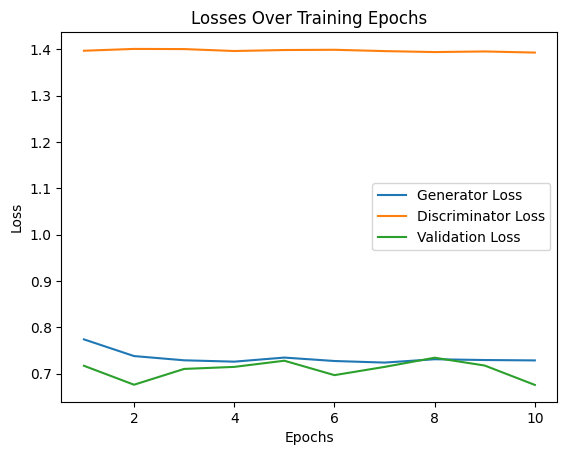

In [16]:
import matplotlib.pyplot as plt

# Plot losses
plt.plot(range(1, num_epochs + 1), gen_losses, label='Generator Loss')
plt.plot(range(1, num_epochs + 1), disc_losses, label='Discriminator Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses Over Training Epochs')
plt.legend()
plt.show()

In [17]:
criterion_D = nn.MSELoss()

In [43]:
generator2 = Generator().to(device)
discriminator2 = Discriminator().to(device)


# mean square training

In [44]:
gen_losses = []
disc_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    epoch_gen_loss = 0.0
    epoch_disc_loss = 0.0

    for batch_idx, (real_images, _) in enumerate(train_loader):
        ############################
        # Train Discriminator
        ###########################
        discriminator2.zero_grad()

        # Train with real images
        real_images = real_images.to(device)
        real_outputs = discriminator2(real_images)
        real_targets = torch.ones(real_images.size(0), 1).to(device)  # Real labels

        loss_real = criterion_D(real_outputs, real_targets)

        # Train with fake images
        noise = torch.randn(batch_size, 168).to(device)  # Assuming 168 is the input size
        fake_images = generator2(noise)
        fake_outputs = discriminator2(fake_images.detach())  # Detach to avoid generator gradients
        fake_targets = torch.zeros(fake_images.size(0), 1).to(device)  # Fake labels

        loss_fake = criterion_D(fake_outputs, fake_targets)

        # Total discriminator loss
        loss_D = 0.5 * (loss_real + loss_fake)

        loss_D.backward()
        optimizer_D.step()

        ############################
        # Train Generator
        ###########################
        generator2.zero_grad()

        fake_outputs = discriminator2(fake_images)
        real_targets = torch.ones(fake_images.size(0), 1).to(device)  # Fooling the discriminator

        # Generator loss
        loss_G = criterion_G(fake_outputs, real_targets)

        loss_G.backward()
        optimizer_G.step()

        # Accumulate losses
        epoch_gen_loss += loss_G.item()
        epoch_disc_loss += loss_D.item()

        if batch_idx % 100 == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(train_loader)} "
                f"Loss D: {loss_D.item()}, Loss G: {loss_G.item()}"
            )

    # Compute validation loss
    with torch.no_grad():
        val_loss = 0.0
        for val_batch_idx, (val_real_images, _) in enumerate(val_loader):
            val_real_images = val_real_images.to(device)
            val_outputs = discriminator2(val_real_images)
            val_targets = torch.ones(val_real_images.size(0), 1).to(device)
            val_loss += criterion_D(val_outputs, val_targets).item()
        val_loss /= (val_batch_idx + 1)
        val_losses.append(val_loss)

    # Store epoch losses
    gen_losses.append(epoch_gen_loss / len(train_loader))
    disc_losses.append(epoch_disc_loss / len(train_loader))



Epoch [0/10] Batch 0/916 Loss D: 0.9580504894256592, Loss G: 1.2882139682769775
Epoch [0/10] Batch 100/916 Loss D: 0.9595740437507629, Loss G: 1.2719080448150635
Epoch [0/10] Batch 200/916 Loss D: 0.8869249820709229, Loss G: 1.1652272939682007
Epoch [0/10] Batch 300/916 Loss D: 0.9276252388954163, Loss G: 1.2585115432739258
Epoch [0/10] Batch 400/916 Loss D: 0.9906461238861084, Loss G: 1.3064537048339844
Epoch [0/10] Batch 500/916 Loss D: 0.8513021469116211, Loss G: 1.3697469234466553
Epoch [0/10] Batch 600/916 Loss D: 0.8454359769821167, Loss G: 1.2429944276809692
Epoch [0/10] Batch 700/916 Loss D: 0.936817467212677, Loss G: 1.3941750526428223
Epoch [0/10] Batch 800/916 Loss D: 0.9071688652038574, Loss G: 1.142226219177246
Epoch [0/10] Batch 900/916 Loss D: 0.8557430505752563, Loss G: 1.1439869403839111
Epoch [1/10] Batch 0/916 Loss D: 0.7976207733154297, Loss G: 1.2514033317565918
Epoch [1/10] Batch 100/916 Loss D: 0.8271801471710205, Loss G: 1.199817419052124
Epoch [1/10] Batch 200/

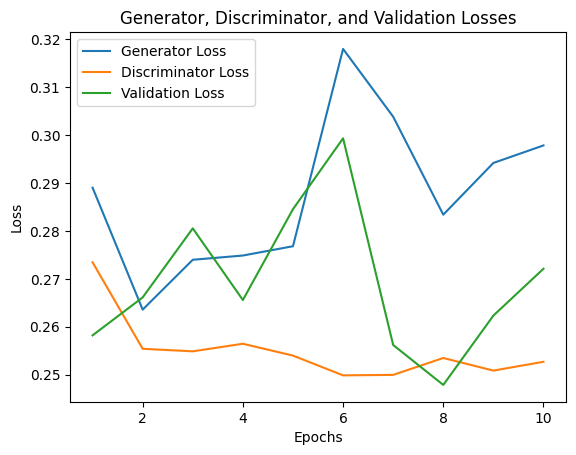

In [19]:

# Plot losses
plt.plot(range(1, num_epochs + 1), gen_losses, label='Generator Loss')
plt.plot(range(1, num_epochs + 1), disc_losses, label='Discriminator Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Generator, Discriminator, and Validation Losses')
plt.legend()
plt.show()

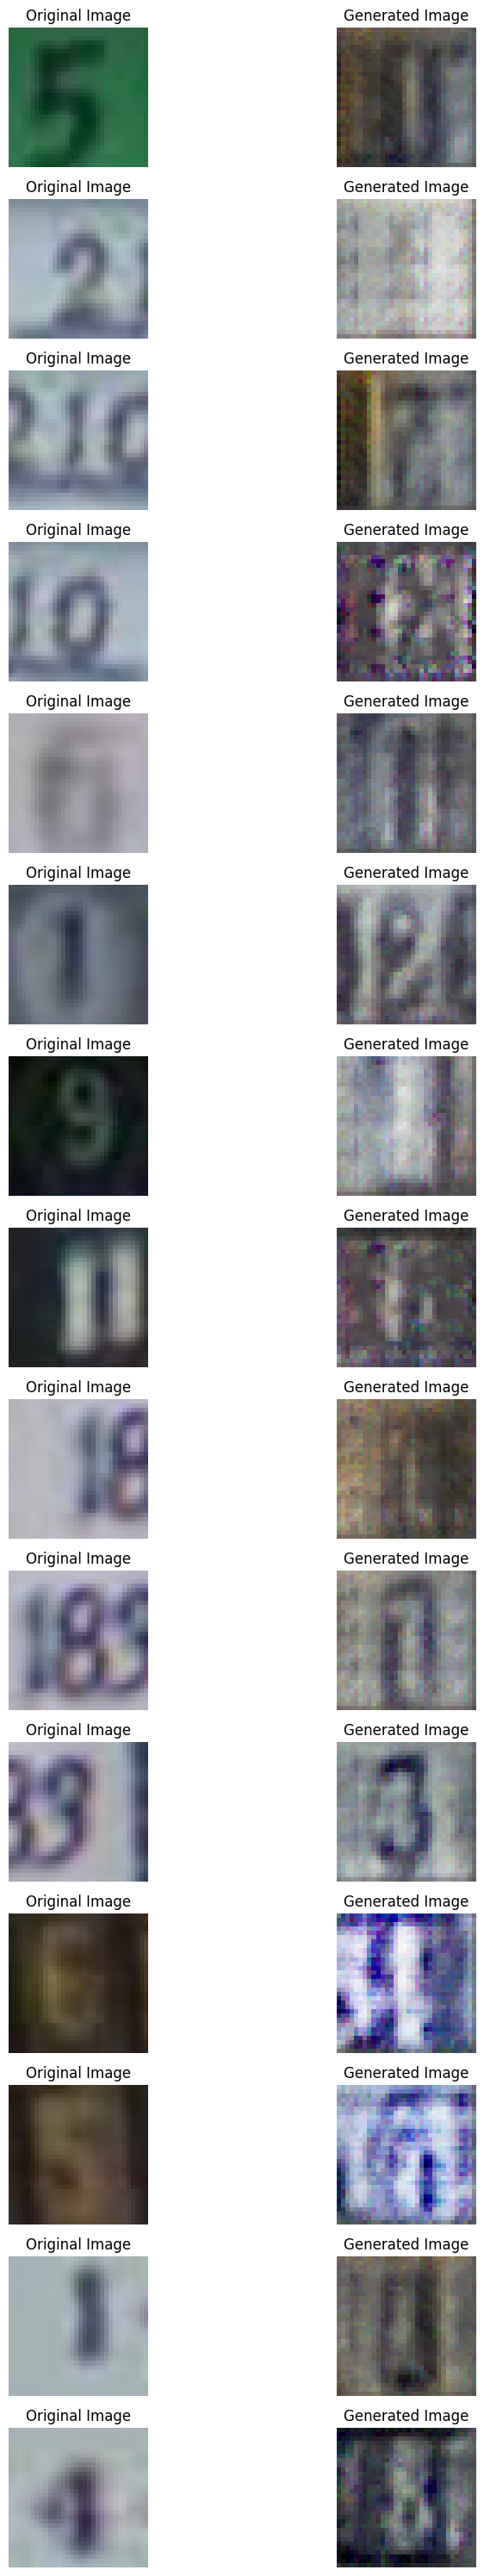

In [29]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy as np
from torchvision.models import  inception_v3
from scipy.stats import entropy
from scipy.linalg import sqrtm
import os

# Number of images to generate
num_images = 15

# Generate images using the generator
with torch.no_grad():
    noise = torch.randn(num_images, 168).to(device)  # Assuming 168 is the input size
    generated_images = generator(noise).cpu()

# Take a batch of original images from the test dataset
original_images, _ = next(iter(test_loader))
original_images = original_images[:num_images].cpu()

# Plot original and generated images
fig, axes = plt.subplots(num_images, 2, figsize=(10, 30))

for i in range(num_images):
    # Plot original image
    axes[i, 0].imshow(original_images[i].permute(1, 2, 0))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Plot generated image
    axes[i, 1].imshow(generated_images[i].permute(1, 2, 0))
    axes[i, 1].set_title("Generated Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


# VISUALISE

In [55]:
# Function to generate synthetic images using the generator
def generate_images(generator, num_images):
    with torch.no_grad():
        noise = torch.randn(num_images, 168).to(device)  # Assuming 168 is the input size
        generated_images = generator(noise).cpu()
    return generated_images

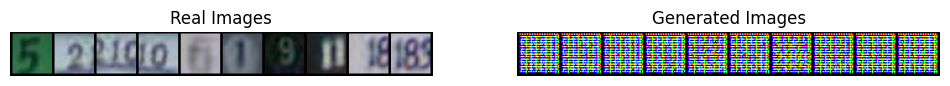

In [66]:

# Generate synthetic images using the trained generator
num_images = 10  # Choose the number of synthetic images to generate
generated_images = generate_images(generator, num_images)

# Load a batch of real images from the test dataset
real_images, _ = next(iter(test_loader))
real_images = real_images[:num_images]

# Visualize the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(vutils.make_grid(real_images, nrow=10).permute(1, 2, 0))
axes[0].set_title("Real Images")
axes[0].axis("off")
axes[1].imshow(vutils.make_grid(generated_images, nrow=100).permute(1, 2, 0))
axes[1].set_title("Generated Images")
axes[1].axis("off")
plt.show()

# FID score

In [ ]:
import torch

def calculate_fid_score(real_images, generated_images):
    # Ensure that both real_images and generated_images have the same shape
    assert real_images.shape == generated_images.shape, "Input images must have the same shape"

    # Calculate mean and covariance of features for real and generated images
    mu_real = torch.mean(real_images, dim=0)
    mu_generated = torch.mean(generated_images, dim=0)

    # Transpose the input tensors for covariance calculation
    real_images_t = real_images.view(real_images.shape[0], -1).T
    generated_images_t = generated_images.view(generated_images.shape[0], -1).T

    sigma_real = torch.cov(real_images_t)
    sigma_generated = torch.cov(generated_images_t)

    # Compute the square root of the covariance matrices
    _, U_real = torch.linalg.eigh(sigma_real, UPLO='U')
    _, U_generated = torch.linalg.eigh(sigma_generated, UPLO='U')

    sqrt_sigma_real = U_real @ torch.diag(torch.sqrt(torch.abs(_))) @ U_real.T
    sqrt_sigma_generated = U_generated @ torch.diag(torch.sqrt(torch.abs(_))) @ U_generated.T

    # Calculate squared difference between means
    mu_diff = torch.norm(mu_real - mu_generated)

    # Calculate the trace of the product of square root covariances
    sigma_diff = torch.trace(sqrt_sigma_real @ sqrt_sigma_real + sqrt_sigma_generated @ sqrt_sigma_generated - 2 * (sqrt_sigma_real @ sqrt_sigma_generated).sqrtm())

    # Calculate FID score
    fid_score = mu_diff + sigma_diff

    return fid_score

# Example usage:
real_images = torch.randn(1, 3, 64, 64)  # Example real images with shape [batch_size, channels, height, width]
generated_images = torch.randn(1, 3, 64, 64)  # Example generated images with the same shape
fid_score = calculate_fid_score(real_images, generated_images)
print(f"FID Score: {fid_score}")


<ipython-input-69-98bde80493de>:15: UserWarning: cov(): degrees of freedom is <= 0. Correction should be strictly less than the number of observations. (Triggered internally at ../aten/src/ATen/native/Correlation.cpp:117.)
  sigma_real = torch.cov(real_images_t)
<ipython-input-69-98bde80493de>:16: UserWarning: cov(): degrees of freedom is <= 0. Correction should be strictly less than the number of observations. (Triggered internally at ../aten/src/ATen/native/Correlation.cpp:117.)
  sigma_generated = torch.cov(generated_images_t)
